# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [6]:
import matplotlib.pyplot as plt
import random
import timeit

def jarvismarch(inputSet, plot = True):
    points = inputSet

    def random_points(n):
        for i in range(n):
            points.append((random.randint(0, 32767), random.randint(0, 32767)))
        return points
    
    if len(points) == 0:
        points = random_points(1000000)

    def left_most_index(points):
        first_index = 0
        for i in range(1, len(points)):
            if points[i][0] < points[first_index][0]:
                first_index = i
            elif points[i][0] == points[first_index][0]:
                if points[i][1] > points[first_index][1]:
                    first_index = i
        return first_index

    def determinant_orientation(p, q, r):
        val = (q[1] - p[1]) * (r[0] - p[0]) - (q[0] - p[0]) * (r[1] - p[1])

        if val == 0:
            return 0
        elif val > 0:
            return 1
        else:
            return 2
        
    def random_points(n):
        for i in range(n):
            points.append((random.randint(0, 32767), random.randint(0, 32767)))
        return points
    
    def plot_points(points, hull):
        x = [p[0] for p in points]
        y = [p[1] for p in points]
        hull_x = [p[0] for p in hull]
        hull_y = [p[1] for p in hull]

        plt.title("Jarvis March")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.scatter(x, y, 10, color = "black")
        plt.plot(hull_x, hull_y, color = "red")
        plt.show()

    n = len(points)
    if n < 3:
        return
    first = left_most_index(points)
    outputSet = []
    p = first
    while True:
        outputSet.append(points[p])
        q = (p + 1) % n
        for r in range(n):
            if determinant_orientation(points[p], points[q], points[r]) == 2:
                q = r
        p = q
        if p == first:
            break
    outputSet.append(outputSet[0]) # added the starting point again to close the convex hull
    if plot:
        plot_points(points, outputSet)

    return outputSet

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [7]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import timeit

def grahamscan(inputSet, plot = True):
    
    pts = []

    def random_points(n):
        for i in range(n):
            pts.append((random.randint(0, 32767), random.randint(0, 32767)))
        return pts
    
    pts = inputSet
    if len(pts) == 0:
        pts = random_points(1000000)
        
    def sort(pts):
        def compare_angles(p1, p2):
            angle1 = math.atan2(p1[1] - p0[1], p1[0] - p0[0])
            angle2 = math.atan2(p2[1] - p0[1], p2[0] - p0[0])
            return angle1 < angle2
        def partition(arr, low, high):
            pivot = arr[high]
            i = low - 1
            for j in range(low, high):
                if compare_angles(arr[j], pivot):
                    i += 1
                    arr[i], arr[j] = arr[j], arr[i]
            arr[i + 1], arr[high] = arr[high], arr[i + 1]
            return i + 1
        def quicksort(arr, low, high):
            if low < high:
                pi = partition(arr, low, high)
                quicksort(arr, low, pi - 1)
                quicksort(arr, pi + 1, high)
        if len(pts) < 3:
            return pts
        p0 = min(pts, key=lambda p: p[0])
        pts.remove(p0)
        pts.sort(key=lambda p: math.atan2(p[1] - p0[1], p[0] - p0[0]))
        pts.insert(0, p0)
        return pts
    
    pts = sort(pts)
    p0 = pts[0]
    if plot:
        fig, ax = plt.subplots()

    outputSet = []

    def cross_product(p1, p2, p3):
        return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

    for i, p in enumerate(pts):
        while len(outputSet) > 1 and cross_product(outputSet[-2], outputSet[-1], p) <= 0:
            outputSet.pop()
        outputSet.append(p)
        if plot:
            ax.clear()
            ax.scatter([x[0] for x in pts], [x[1] for x in pts], 10, color="black")  # All other points - black
            ax.scatter(p0[0], p0[1], 10, color="blue")  # Starting point - blue
            ax.scatter([x[0] for x in outputSet[1:]], [x[1] for x in outputSet[1:]], 10, color="green")  # points in the outputSet - green
            if i < len(pts) - 1:
                ax.scatter(pts[i + 1][0], pts[i + 1][1], 10, color="red")  # The next point - red
            ax.plot([x[0] for x in outputSet] + [outputSet[0][0]], [x[1] for x in outputSet] + [outputSet[0][1]], 10, color="green")
            plt.pause(0.01)
    outputSet.append(p0)
    
    if plot:
        plt.tight_layout()
        plt.show()
    outputSet.pop()

    return outputSet

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [8]:
import math
import timeit
import matplotlib.pyplot as plt
import random

def chen(inputSet, plot = True):

    def random_points(n):
        for i in range(n):
            inputSet.append((random.randint(0, 32767), random.randint(0, 32767)))
        return inputSet

    def orientation(p, q, r):
        '''
        returns 0 if p, q, r are colinear, 1 if they are clockwise, -1 if they are counterclockwise
        '''
        val = (q[0] - p[0])*(r[1] - p[1]) - (r[0] - p[0])*(q[1] - p[1])
        return (val > 0) - (val < 0)
    
    def search_tangent(subset, p):
        if p in subset:
            return subset[(subset.index(p) + 1) % len(subset)]
        left, right = 0, len(subset)
        lprev = orientation(p, subset[0], subset[-1])
        lnext = orientation(p, subset[0], subset[(left + 1) % right])
        while left < right:
            mid = (left + right) // 2
            mprev = orientation(p, subset[mid], subset[(mid - 1) % len(subset)])
            mnext = orientation(p, subset[mid], subset[(mid + 1) % len(subset)])
            mside = orientation(p, subset[left], subset[mid])
            if mprev != -1 and mnext != -1:
                return subset[mid]
            elif mside == 1 and (lnext == -1 or lprev == lnext) or mside == -1 and mprev == -1:
                right = mid
            else:
                left = mid + 1
                lprev = -mnext
                lnext = orientation(p, subset[left-1], subset[(left + 1) % len(subset)])
        return subset[0]
    
    pts = inputSet
    if len(pts) == 0:
        pts = random_points(100)
    n = len(pts)
    m = int(math.sqrt(n))
    t = 1

    # This loop is to automatically find a proper m without manually setting it to eliminate the case the algorithm incompletes when testing
    while True:
        m = min(m, n)
        subsets = [pts[i:i + m] for i in range(0, n, m)]
        hulls = [grahamscan(subset, plot=False) for subset in subsets]
        p0 = min(min(hulls), key=lambda p: p[0])
        outputSet = []
        pthis = p0

        if plot:
            fig, ax = plt.subplots()
            colors = [(random.random()/10, random.random()/10, random.random()) for _ in range(len(hulls))]

        for _ in range(1, m+1):
            if plot:
                ax.clear()
                ax.set_title("Chan's Algorithm")
                ax.set_xlabel("x-axis")
                ax.set_ylabel("y-axis")
                ax.scatter(*zip(*pts), 10, color='black')
                for i, hull in enumerate(hulls):
                    color = colors[i]
                    for j in range(len(hull)):
                        ax.scatter(*hull[j], 10, color=color)
                        ax.plot(*zip(*[hull[j-1], hull[j]]), color=color)
                    ax.plot(*zip(*[hull[-1], hull[0]]), color=color)
            tangents = []
            for hull in hulls:
                tangent = search_tangent(hull, pthis)
                tangents.append(tangent)
            if plot:
                ax.scatter(*zip(*tangents), 10, color='red')
            most_cw_tangent = tangents[0]
            for i in range(1, len(tangents)):
                if orientation(pthis, most_cw_tangent, tangents[i]) < 0:
                    most_cw_tangent = tangents[i]
            pthis = most_cw_tangent
            outputSet.append(most_cw_tangent)
            if plot:
                ax.plot(*zip(*outputSet, outputSet[0]), color='green')
                ax.scatter(*most_cw_tangent, 10, color='yellow')
                for point in outputSet:
                    plt.scatter(*point, 10, color='green')
                plt.pause(0.01)
            if pthis == p0:
                if plot:
                    plt.tight_layout()
                    plt.show()
                return outputSet
        t += 1
        m = min(2**(2**t), len(pts))
    return "incomplete"

Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [9]:
import random

class TestDataGenerator():
    
    def __init__(self, x_range, y_range):
        self.x_range = x_range
        self.y_range = y_range

    def generate_random_convex_polygon(self, n):
        # Generate two lists of random X and Y coordinates within the range 1 to 10,000
        x_pool = [random.randint(0, 32767) for _ in range(n)]
        y_pool = [random.randint(0, 32767) for _ in range(n)]
        
        x_pool.sort()
        y_pool.sort()

        # Isolate the extreme points
        min_x, max_x = x_pool[0], x_pool[-1]
        min_y, max_y = y_pool[0], y_pool[-1]

        # Divide the interior points into two chains & Extract the vector components
        x_vec, y_vec = [], []

        last_top, last_bot = min_x, min_x
        for x in x_pool[1:-1]:
            if random.choice([True, False]):
                x_vec.append(x - last_top)
                last_top = x
            else:
                x_vec.append(last_bot - x)
                last_bot = x
        x_vec += [max_x - last_top, last_bot - max_x]

        last_left, last_right = min_y, min_y
        for y in y_pool[1:-1]:
            if random.choice([True, False]):
                y_vec.append(y - last_left)
                last_left = y
            else:
                y_vec.append(last_right - y)
                last_right = y
        y_vec += [max_y - last_left, last_right - max_y]

        # Randomly pair up the X- and Y-components
        random.shuffle(y_vec)

        # Combine the paired up components into vectors
        vec = [(x_vec[i], y_vec[i]) for i in range(n)]

        # Sort the vectors by angle
        vec.sort(key=lambda v: math.atan2(v[1], v[0]))

        # Lay them end-to-end
        x, y = 0, 0
        min_polygon_x, min_polygon_y = 0, 0
        points = []

        for vx, vy in vec:
            points.append((x, y))
            x += vx
            y += vy
            min_polygon_x = min(min_polygon_x, x)
            min_polygon_y = min(min_polygon_y, y)

        # Move the polygon to the original min and max coordinates
        x_shift = min_x - min_polygon_x
        y_shift = min_y - min_polygon_y
        points = [(int(p[0] + x_shift), int(p[1] + y_shift)) for p in points]
        return points

    def is_point_inside_polygon(self, x, y, polygon):
        n = len(polygon)
        inside = False
        p1x, p1y = polygon[0]
        for i in range(n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xinters:
                            inside = not inside
            p1x, p1y = p2x, p2y
        return inside

    def generate_points_inside_polygon(self, polygon, num_points):
        min_x = min(polygon, key=lambda t: t[0])[0]
        max_x = max(polygon, key=lambda t: t[0])[0]
        min_y = min(polygon, key=lambda t: t[1])[1]
        max_y = max(polygon, key=lambda t: t[1])[1]
        points_inside = []
        while len(points_inside) < num_points:
            x = random.randint(min_x, max_x)
            y = random.randint(min_y, max_y)
            if self.is_point_inside_polygon(x, y, polygon):
                points_inside.append((x, y))
        return points_inside
    
    def generate_random_points(self, n):
        points = []
        for i in range(n):
            points.append((random.randint(self.x_range[0], self.x_range[1]), random.randint(self.y_range[0], self.y_range[1])))
        return points


Use the cell below to implement the requested **experimental framework** API.

In [10]:
import timeit
import matplotlib

class ExperimentalFramework():
    def __init__(self, n_range, h_range, x_range, y_range, chan = True, graham = True, jarvis = True, equal = False):
        self.n_range = n_range
        self.h_range = h_range
        self.x_range = x_range
        self.y_range = y_range
        self.results = []
        self.include_chans = chan
        self.include_graham = graham
        self.include_jarvis = jarvis
        self.equal = equal

    def time_algorithms(self, points):
        chans_time, graham_time, jarvis_time = None, None, None
        if self.include_chans:
            chans_time = timeit.timeit(lambda: chen(points, plot=False), number=1)
        if self.include_graham:
            graham_time = timeit.timeit(lambda: grahamscan(points, plot=False), number=1)
        if self.include_jarvis:
            jarvis_time = timeit.timeit(lambda: jarvismarch(points, plot=False), number=1)
        return chans_time, graham_time, jarvis_time

    def run_experiment(self, count=1):
        for n in self.n_range:
            print(n)
            for h in self.h_range:
                if self.equal and n != h:
                    continue
                data_gen = TestDataGenerator(self.x_range, self.y_range)
                if h:
                    hull = data_gen.generate_random_convex_polygon(h)
                    points = hull + data_gen.generate_points_inside_polygon(hull, n-h)
                else:
                    points = data_gen.generate_random_points(n)
                chans_times, graham_times, jarvis_times = [], [], []
                for _ in range(count):
                    chans_time, graham_time, jarvis_time = self.time_algorithms(points)
                    if self.include_chans:
                        chans_times.append(chans_time)
                    if self.include_graham:
                        graham_times.append(graham_time)
                    if self.include_jarvis:
                        jarvis_times.append(jarvis_time)
                chans_mean = sum(chans_times) / count if self.include_chans else None
                graham_mean = sum(graham_times) / count if self.include_graham else None
                jarvis_mean = sum(jarvis_times) / count if self.include_jarvis else None
                self.results.append((n, h, chans_mean, graham_mean, jarvis_mean))
    
    def plot_results(self):
        h_values_set = set(h for _, h, _, _, _ in self.results)
        for h in h_values_set:
            plt.figure(figsize=(10, 6))
            if self.equal:
                n_values, chans_times, graham_times, jarvis_times = zip(*[(n, ct, gt, jt) for n, _, ct, gt, jt in self.results])
            else:
                n_values, chans_times, graham_times, jarvis_times = zip(*[(n, ct, gt, jt) for n, h_val, ct, gt, jt in self.results if h_val == h])
            if self.include_chans:
                plt.plot(n_values, chans_times, label='Chan\'s Algorithm')
                plt.scatter(n_values, chans_times, 5, color='black')
            if self.include_graham:
                plt.plot(n_values, graham_times, label='Graham Scan Algorithm')
                plt.scatter(n_values, graham_times, 5, color='black')
            if self.include_jarvis:
                plt.plot(n_values, jarvis_times, label='Jarvis March Algorithm')
                plt.scatter(n_values, jarvis_times, 5, color='black')
            plt.xlabel('Number of Points (n)')
            plt.ylabel('Execution Time (seconds)')
            plt.legend()
            if self.equal:
                plt.title(f'n = h')
                break
            plt.title(f'h = {h}')
        plt.show()

    def plot_results_one_algorithm(self):
        h_values_set = sorted(set(h for _, h, _, _, _ in self.results))
        plt.figure(figsize=(10, 6))
        for h in h_values_set:
            n_values, chans_times, graham_times, jarvis_times = zip(*[(n, ct, gt, jt) for n, h_val, ct, gt, jt in self.results if h_val == h])
            if self.include_graham:
                plt.plot(n_values, graham_times, label=str(h))
                plt.scatter(n_values, graham_times, 5, color='black')
                title = 'Graham Scan Algorithm'
            if self.include_chans:
                plt.plot(n_values, chans_times, label=str(h))
                plt.scatter(n_values, chans_times, 5, color='black')
                title = 'Chan\'s Algorithm'
            if self.include_jarvis:
                plt.plot(n_values, jarvis_times, label=str(h))
                plt.scatter(n_values, jarvis_times, 5, color='black')
                title = 'Jarvis March Algorithm'
            plt.xlabel('Number of Points (n)')
            plt.ylabel('Execution Time (seconds)')
            plt.title(title)
            plt.legend()
        plt.show()  

    def plot_results_3d(self):
        n_values, h_values, chans_times, jarvis_times = zip(*[(n, h, ct, jt) for n, h, ct, _, jt in self.results])

        if self.include_chans:
            algorithm_time = chans_times
            title = 'Chan\'s Algorithm'
        if self.include_jarvis:
            algorithm_time = jarvis_times
            title = 'Jarvis March Algorithm'

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Color by execution time: normalize and map the execution time to a colormap
        times_normalized = [t / max(algorithm_time) for t in algorithm_time]
        colors = plt.cm.jet(times_normalized)

        scatter = ax.scatter(n_values, h_values, algorithm_time, c=colors, marker='o')

        ax.set_xlabel('Number of Points (n)')
        ax.set_ylabel('Hull Size (h)')
        ax.set_zlabel('Execution Time (seconds)')
        plt.title(title)
        plt.show()

    def print_results(self):
        headers = ['n', 'h', "Chan's Algorithm Time", 'Graham Scan Time', 'Jarvis March Time']
        data = self.results
        lengths = [max(len(str(val)) for val in col) for col in zip(headers, *data)]
        lengths = [max(len(headers[i]), lengths[i]) for i in range(len(lengths))]
        row_format = '|'.join(['{:<' + str(length) + '}' for length in lengths])
        print(row_format.format(*headers))
        for row in data:
            print(row_format.format(*row))

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

1
11
21
31
41
51
61
71
81
91
101
111
121
131
141
151
161
171
181
191
201
211
221
231
241
251
261
271
281
291
301
311
321
331
341
351
361
371
381
391
401
411
421
431
441
451
461
471
481
491
501
511
521
531
541
551
561
571
581
591
601
611
621
631
641
651
661
671
681
691
701
711
721
731
741
751
761
771
781
791
801
811
821
831
841
851
861
871
881
891
901
911
921
931
941
951
961
971
981
991


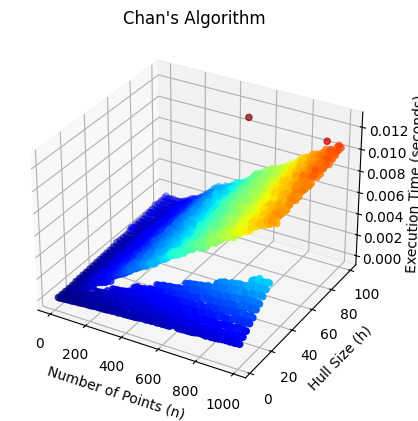

In [11]:
n = range(10000,100001,10000)
h = [3,10,25,100]
# framework = ExperimentalFramework(n, h, (0, 32767), (0, 32767)) # 3
framework = ExperimentalFramework(range(1, 1000, 10), range(3, 100, 3), (0, 32767), (0, 32767), graham=False, jarvis=False)
framework.run_experiment(count = 1)
framework.plot_results_3d()
# framework.print_results()